In [1]:
import sys
sys.path.append('/home/gvolta/XENONnT/gain_spe/')
from PMTanalysis import *
PMT = PMTanalyzer('/home/gvolta/XENONnT/gain_spe')





___   ___  _______ .__   __.   ______   .__   __.        .___________.   __  __             _____    _____    ____  
\  \ /  / |   ____||  \ |  |  /  __  \  |  \ |  |        |           |  |  \/  |    /\     / ____|  |_   _| /  ___| 
 \  V  /  |  |__   |   \|  | |  |  |  | |   \|  |  _   _ `---|  |----`  | \  / |   /  \    | |  __    | |   | |      
  >   <   |   __|  |  . `  | |  |  |  | |  . `  | | \ | |    |  |       | |\/| |  / /\ \   | | |_ |   | |   | |      
 /  .  \  |  |____ |  |\   | |  `--`  | |  |\   | |  \| |    |  |       | |  | | / ____ \  | |__| |  _| |_  | |___  
/__/ \__\ |_______||__| \__|  \______/  |__| \__| |_|\__|    |__|       |_|  |_|/_/    \_\ \ _____| |_____| \_____|  
powered by Giovanni Volta, Chiara Capelli and Shingo Kazama (c)




Configuration file:  /home/gvolta/XENONnT/gain_spe/configuration.ini


In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.animation import FuncAnimation
from matplotlib.collections import PatchCollection
from matplotlib.patches import Circle
import matplotlib.colors as mcolors
#mpl.use('Agg')

In [3]:
import strax
import straxen
strax.Mailbox.DEFAULT_MAX_MESSAGES = 2
st = straxen.contexts.xenon1t_led()

/opt/XENONnT/anaconda/envs/XENONnT_development/lib/python3.6/site-packages/strax/context.py:202: UserWarning: Unknown config option free_options; will do nothing.
  warnings.warn(f"Unknown config option {k}; will do nothing.")
/opt/XENONnT/anaconda/envs/XENONnT_development/lib/python3.6/site-packages/strax/context.py:208: UserWarning: Invalid context option free_options; will do nothing.
  warnings.warn(f"Invalid context option {k}; will do nothing.")


In [4]:
Config = cp.ConfigParser()
Config.read(PMT.config_file)

['/home/gvolta/XENONnT/gain_spe/configuration.ini']

## _Test of PMT analyzer class_

In [5]:
led_window   = [Config.getint('window_pars','led_windows_left'), 
                Config.getint('window_pars','led_windows_right')]
noise_window = [Config.getint('window_pars','noise_windows_left'), 
                Config.getint('window_pars','noise_windows_right')]

In [6]:
st = st.new_context(config=dict(led_window=(led_window[0],led_window[1]), 
                                noise_window=(noise_window[0], noise_window[1]),
                                channel_list=(127,131)))
st.show_config('led_calibration')

/opt/XENONnT/anaconda/envs/XENONnT_development/lib/python3.6/site-packages/strax/context.py:370: UserWarning: Option check_raw_record_overlaps not taken by any registered plugin
  warnings.warn(f"Option {k} not taken by any registered plugin")
/opt/XENONnT/anaconda/envs/XENONnT_development/lib/python3.6/site-packages/strax/context.py:370: UserWarning: Option n_tpc_pmts not taken by any registered plugin
  warnings.warn(f"Option {k} not taken by any registered plugin")
/opt/XENONnT/anaconda/envs/XENONnT_development/lib/python3.6/site-packages/strax/context.py:370: UserWarning: Option channel_map not taken by any registered plugin
  warnings.warn(f"Option {k} not taken by any registered plugin")
/opt/XENONnT/anaconda/envs/XENONnT_development/lib/python3.6/site-packages/strax/context.py:370: UserWarning: Option hev_gain_model not taken by any registered plugin
  warnings.warn(f"Option {k} not taken by any registered plugin")
/opt/XENONnT/anaconda/envs/XENONnT_development/lib/python3.6/sit

,option,default,current,applies_to,help
0,baseline_window,"(0, 50)",<OMITTED>,"(led_calibration,)",Window (samples) for baseline calculation.
1,led_window,"(50, 115)","(144, 181)","(led_calibration,)",Window (samples) where we expect the signal in LED calibration
2,noise_window,"(120, 185)","(50, 87)","(led_calibration,)",Window (samples) to analysis the noise
3,channel_list,"(0, 248)","(127, 131)","(led_calibration,)","Three different light level for XENON1T: (0,36), (37,126), (127,248). Defalt value: all the PMTs"
4,pax_raw_dir,/data/xenon/raw,<OMITTED>,"(raw_records,)",Directory with raw pax datasets
5,stop_after_zips,0,<OMITTED>,"(raw_records,)",Convert only this many zip files. 0 = all.
6,events_per_chunk,50,<OMITTED>,"(raw_records,)",Number of events to yield per chunk
7,samples_per_record,110,<OMITTED>,"(raw_records,)",Number of samples per record


In [7]:
st.data_info('led_calibration')

/opt/XENONnT/anaconda/envs/XENONnT_development/lib/python3.6/site-packages/strax/context.py:370: UserWarning: Option check_raw_record_overlaps not taken by any registered plugin
  warnings.warn(f"Option {k} not taken by any registered plugin")
/opt/XENONnT/anaconda/envs/XENONnT_development/lib/python3.6/site-packages/strax/context.py:370: UserWarning: Option n_tpc_pmts not taken by any registered plugin
  warnings.warn(f"Option {k} not taken by any registered plugin")
/opt/XENONnT/anaconda/envs/XENONnT_development/lib/python3.6/site-packages/strax/context.py:370: UserWarning: Option channel_map not taken by any registered plugin
  warnings.warn(f"Option {k} not taken by any registered plugin")
/opt/XENONnT/anaconda/envs/XENONnT_development/lib/python3.6/site-packages/strax/context.py:370: UserWarning: Option hev_gain_model not taken by any registered plugin
  warnings.warn(f"Option {k} not taken by any registered plugin")
/opt/XENONnT/anaconda/envs/XENONnT_development/lib/python3.6/sit

,Field name,Data type,Comment
0,area_led,float64,Area averaged in integration LED windows
1,area_noise,float64,Area averaged in integration noise windows
2,amplitude_led,int32,Amplitude in LED window
3,amplitude_noise,int32,Amplitude in off LED window
4,channel,int16,Channel
5,time,int64,Start time of the interval (ns since unix epoch)
6,dt,int16,Time resolution in ns
7,length,int32,Length of the interval in samples


In [8]:
run_gain_step1 = str(PMT.run_gain_step1)
run_gain_step0 = str(PMT.run_gain_step0)

In [9]:
data_gs1 = st.get_array(run_gain_step1, 'led_calibration', max_workers=10)


/opt/XENONnT/anaconda/envs/XENONnT_development/lib/python3.6/site-packages/strax/context.py:370: UserWarning: Option check_raw_record_overlaps not taken by any registered plugin
  warnings.warn(f"Option {k} not taken by any registered plugin")
/opt/XENONnT/anaconda/envs/XENONnT_development/lib/python3.6/site-packages/strax/context.py:370: UserWarning: Option n_tpc_pmts not taken by any registered plugin
  warnings.warn(f"Option {k} not taken by any registered plugin")
/opt/XENONnT/anaconda/envs/XENONnT_development/lib/python3.6/site-packages/strax/context.py:370: UserWarning: Option channel_map not taken by any registered plugin
  warnings.warn(f"Option {k} not taken by any registered plugin")
/opt/XENONnT/anaconda/envs/XENONnT_development/lib/python3.6/site-packages/strax/context.py:370: UserWarning: Option hev_gain_model not taken by any registered plugin
  warnings.warn(f"Option {k} not taken by any registered plugin")
/opt/XENONnT/anaconda/envs/XENONnT_development/lib/python3.6/sit

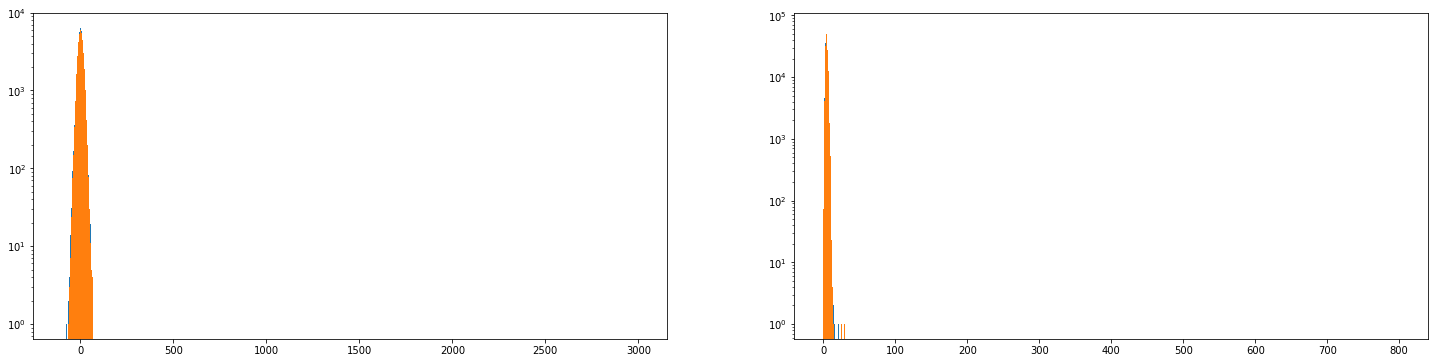

In [28]:
plt.figure(figsize=(25,6))
plt.subplot(121)
plt.hist(data_gs1[data_gs1['channel']==130]['area_noise'], bins=3000, range=[-100, 3000], label='noise')
plt.hist(data_gs1[data_gs1['channel']==130]['area_led'], bins=3000, range=[-100, 3000], label='led')
plt.yscale('log')
plt.subplot(122)
plt.hist(data_gs1[data_gs1['channel']==130]['amplitude_noise'], bins=801, range=[-1, 800], label='noise')
plt.hist(data_gs1[data_gs1['channel']==130]['amplitude_led'], bins=801, range=[-1, 800], label='led')
plt.yscale('log')
plt.show()

In [18]:
led = np.zeros(len(data_gs1), dtype = np.dtype([('channel', 'int16'), ('area', 'float64')]))
noise = np.zeros(len(data_gs1), dtype = np.dtype([('channel', 'int16'), ('area', 'float64')]))
led['channel'] = data_gs1['channel']
led['area'] = data_gs1['area_led']
noise['channel'] = data_gs1['channel']
noise['area'] = data_gs1['area_noise']

In [20]:
O = PMT.get_occupancy(led, noise, channels)

/home/gvolta/XENONnT/gain_spe/PMTanalysis.py:551: RuntimeWarning: divide by zero encountered in double_scalars
  if l_err/l <= 0.05:
/home/gvolta/XENONnT/gain_spe/PMTanalysis.py:564: RuntimeWarning: divide by zero encountered in double_scalars
  if occupancy_err[dummy[idx]]/occupancy[dummy[idx]] < 0.01:


In [25]:
O.dtype

dtype([('channel', '<i2'), ('estimated occupancy', '<f4'), ('estimated occupancy error', '<f4'), ('iteration', '<i2'), ('occupancy', 'O'), ('occupancy error', 'O'), ('threshold', 'O'), ('occupancy smooth', 'O'), ('scaling factor', '<f4'), ('entries', '<i2')])

In [21]:
Gain = PMT.get_gain(led, noise, channels)

/home/gvolta/XENONnT/gain_spe/PMTanalysis.py:652: RuntimeWarning: invalid value encountered in sqrt
  gain_err = self.get_gainconversion(np.sqrt(EPsi_stat_err)) + self.get_gainconversion(EPsi_sys_err)
/home/gvolta/XENONnT/gain_spe/PMTanalysis.py:646: RuntimeWarning: divide by zero encountered in true_divide
  EPsi = (E_s - E_b)/occupancy
/home/gvolta/XENONnT/gain_spe/PMTanalysis.py:647: RuntimeWarning: divide by zero encountered in true_divide
  VPsi = (V_s - V_b)/occupancy - EPsi**2
/home/gvolta/XENONnT/gain_spe/PMTanalysis.py:648: RuntimeWarning: invalid value encountered in add
  EPsi_stat_err = (occupancy*(EPsi**2 + VPsi) + 2.*V_b)/(tot_N*occupancy**2) + (EPsi*EPsi*(np.exp(occupancy) + 1. - 2.*f_b))/(f_b*tot_N*occupancy**2)
/home/gvolta/XENONnT/gain_spe/PMTanalysis.py:649: RuntimeWarning: divide by zero encountered in true_divide
  EPsi_sys_err = (E_s - E_b)*occupancy_err/(occupancy**2)


In [27]:
Gain

array([(127, 4.7322264, nan), (128, 2.1941166, nan),
       (129, 2.5594783, nan), (130,      -inf, nan)],
      dtype=[('channel', '<i2'), ('gain', '<f4'), ('gain error', '<f4')])

In [30]:
channels = np.arange(127, 131, 1, dtype=int)

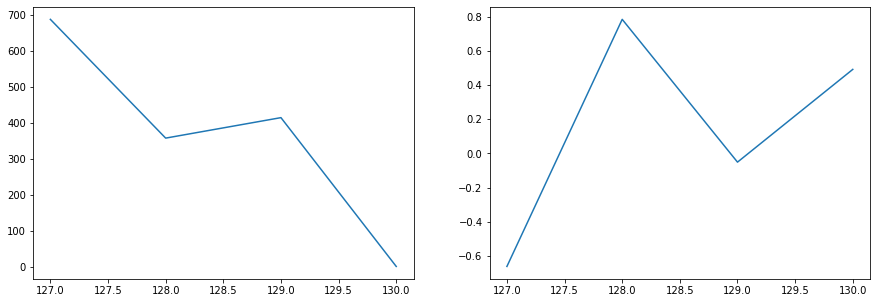

In [35]:
def get_moments(data, channels):
    ''' 
    Function that compute first and second moments (mean and variance) of data distribution.

    Args:
        1. data: PMT(s) array. The array should have channel variable.
        2. channels: list of PMTs n° to analize.

    Note:
        1. this function is used for gain calculation.

    Output:
        1. moments: array with mean and variance.

    '''  
    datatype = [('channel', np.int16), 
                ('mean', np.float32), 
                ('variance', np.float32)]
    moments =  np.zeros(len(channels), dtype = datatype)

    for i, ch in enumerate(channels):
        area = data[data['channel']==ch]['area']
        hist, bins  = np.histogram(area, range=(-1000, 5000), bins=6000)
        mids = 0.5*(bins[1:] + bins[:-1])

        moments[i]['channel']  = ch
        moments[i]['mean']     = np.average(mids, weights=hist)
        moments[i]['variance'] = np.average((mids - np.average(mids, weights=hist))**2, weights=hist)

    return moments

moments_s = get_moments(led, channels)
moments_b = get_moments(noise, channels)

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(moments_s['channel'], moments_s['mean'])
plt.subplot(122)
plt.plot(moments_b['channel'], moments_b['mean'])

/opt/XENONnT/anaconda/envs/XENONnT_development/lib/python3.6/site-packages/ipykernel_launcher.py:75: RuntimeWarning: divide by zero encountered in double_scalars
/opt/XENONnT/anaconda/envs/XENONnT_development/lib/python3.6/site-packages/ipykernel_launcher.py:88: RuntimeWarning: divide by zero encountered in double_scalars


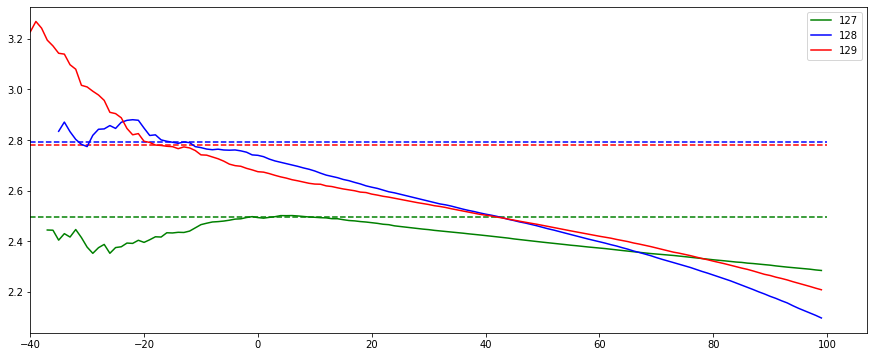

In [94]:
def get_occupancy(data_s, data_b, channels, order=10):
    ''' 
    Function that occupancy (poisson parameter) of data distribution.

    #TODO: comments the important steps 

    Args:
        1. data_s: signal PMT(s) array.
        2. data_b: noise PMT(s) array.
        3. channels: list of PMTs n° to analize.

    Note:

    Output:
        1. Occupancy:
            - estimated occupancy: 
            - estimated occupancy error:
            - iteration: 
            - occupancy: 
            - occupancy error:
            - threshold: 
            - occupancy smooth: 
            - scaling factor:
            - entries: 
    '''  

    datatype = [('channel', np.int16), 
                ('estimated occupancy', np.float32), 
                ('estimated occupancy error', np.float32),
                ('iteration', np.int16),
                ('occupancy', object), ('occupancy error', object), ('threshold', object), 
                ('occupancy smooth', object), ('scaling factor', np.float32), 
                ('entries', np.float32)]

    Occupancy =  np.zeros(len(channels), dtype = datatype)

    moments_s = get_moments(data_s, channels)
    moments_b = get_moments(data_b, channels)

    for i, ch in enumerate(channels):
        area_s = data_s[data_s['channel']==ch]['area']
        signal, bins     = np.histogram(area_s, range=(-1000, 5000), bins=6000)

        area_b = data_b[data_b['channel']==ch]['area']
        background, bins = np.histogram(area_b, range=(-1000, 5000), bins=6000)

        E_s = moments_s[moments_s['channel']==ch]['mean']

        if E_s > 0:
            threshold = -150
        else:
            threshold = -50

        ini_threshold = threshold    
        end_threshold = 100
        start = np.digitize(-1000, bins)

        occupancy     = []
        occupancy_err = []
        thr           = []

        tot_entries_b = np.sum(background)

        while threshold < end_threshold: 
            bin_threshold = np.digitize(threshold, bins)

            Ab = np.sum(background[start:bin_threshold])
            As = np.sum(signal[start:bin_threshold])

            if Ab > 0 and As > 0:
                f = Ab/tot_entries_b
                l = -np.log(As/Ab)
                l_err = np.sqrt((np.exp(l) + 1. - 2.*(Ab/tot_entries_b))/Ab)

                if l_err/l <= 0.05:
                    occupancy.append(l)
                    occupancy_err.append(l_err)
                    thr.append(threshold)
            threshold += 1

        num = len(occupancy) - 1
        if num % 2 == 0:
            num = num - 1

        occupancy_smooth = savgol_filter(occupancy, num, order)
        dummy = occupancy_smooth.argsort()[::-1]
        for idx in range(0, len(dummy)):
            if occupancy_err[dummy[idx]]/occupancy[dummy[idx]] < 0.01:           
                estimated_occupancy = occupancy[dummy[idx]]
                estimated_occupancy_err = occupancy_err[dummy[idx]]
                itr = dummy[idx]
                break
            else:
                estimated_occupancy = 0
                estimated_occupancy_err = 0
                itr = 0

        Occupancy[i]['channel']                   = ch
        Occupancy[i]['estimated occupancy']       = estimated_occupancy
        Occupancy[i]['estimated occupancy error'] = estimated_occupancy_err
        Occupancy[i]['iteration']                 = itr
        Occupancy[i]['occupancy']                 = occupancy
        Occupancy[i]['occupancy error']           = occupancy_err
        Occupancy[i]['threshold']                 = thr
        Occupancy[i]['occupancy smooth']          = occupancy_smooth
        Occupancy[i]['scaling factor']            = f
        Occupancy[i]['entries']                   = tot_entries_b
        
    return Occupancy

Occ = get_occupancy(led, noise, channels)

plt.figure(figsize=(15,6))
plt.plot(Occ[Occ['channel']==127]['threshold'][0], Occ[Occ['channel']==127]['occupancy'][0], 'g-', label='127')
plt.hlines(Occ[Occ['channel']==127]['estimated occupancy'], xmin=-40, xmax=100, color='green', linestyles='dashed')

plt.plot(Occ[Occ['channel']==128]['threshold'][0], Occ[Occ['channel']==128]['occupancy'][0], 'b-', label='128')
plt.hlines(Occ[Occ['channel']==128]['estimated occupancy'], xmin=-40, xmax=100, color='blue', linestyles='dashed')

plt.plot(Occ[Occ['channel']==129]['threshold'][0], Occ[Occ['channel']==129]['occupancy'][0], 'r-', label='129')
plt.hlines(Occ[Occ['channel']==129]['estimated occupancy'], xmin=-40, xmax=100, color='red', linestyles='dashed')
plt.legend(loc=0)
plt.xlim(-40)
plt.show()


In [102]:
def get_gainconversion(mu):
    ''' 
    Function that computed the gain from SPE ADC count.

    Args:
        1. mu: SPE ADC signal.

    Note:

    Output:
        1. gain: multiplication PMT factor.
    '''  
    Z = 50.
    A = 10.
    e = 1.6021766208e-19
    f = 1e8
    r = 2.25/16384.

    gain = mu*r/(Z*A*f*e*1e6)

    return gain

def get_gain(data_s, data_b, channels):
    ''' 
    Function that computed the gain from the occupancy.

    #TODO: comments the important steps 

    Args:
        1. data_s: signal PMT(s) array.
        2. data_b: noise PMT(s) array.
        3. channels: list of PMTs n° to analize.

    Note:

    Output:
        1. Gain: multiplication PMT factor.
    '''  
    datatype = [('channel', np.int16), 
                ('gain', np.float32), 
                ('gain error', np.float32)]

    moments_s = get_moments(data_s, channels)
    moments_b = get_moments(data_b, channels)

    Occupancy = get_occupancy(data_s, data_b, channels)

    Gain = np.zeros(len(channels), dtype = datatype)

    for i, ch in enumerate(channels):
        E_s = moments_s[moments_s['channel']==ch]['mean'][0]
        V_s = moments_s[moments_s['channel']==ch]['variance'][0]
        E_b = moments_b[moments_b['channel']==ch]['mean'][0]
        V_b = moments_b[moments_b['channel']==ch]['variance'][0]
        occupancy = Occupancy[Occupancy['channel']==ch]['estimated occupancy'][0]
        occupancy_err = Occupancy[Occupancy['channel']==ch]['estimated occupancy error'][0]
        tot_N = Occupancy[Occupancy['channel']==ch]['entries'][0]
        f_b = Occupancy[Occupancy['channel']==ch]['scaling factor'][0]
        
        EPsi = (E_s - E_b)/occupancy
        VPsi = (V_s - V_b)/occupancy - EPsi*EPsi
        EPsi_stat_err = (occupancy*(EPsi*EPsi + VPsi) + 2.*V_b)/(tot_N*occupancy*occupancy)  + (EPsi*EPsi*(np.exp(occupancy) + 1. - 2.*f_b))/(f_b*tot_N*occupancy*occupancy)
        EPsi_sys_err = (E_s - E_b)*occupancy_err/(occupancy**2)

        gain = get_gainconversion(EPsi)
        gain_err = get_gainconversion(np.sqrt(EPsi_stat_err)) + get_gainconversion(EPsi_sys_err)

        Gain[i]['channel']    = ch
        Gain[i]['gain']       = gain
        Gain[i]['gain error'] = gain_err

    return Gain

Gain = get_gain(led, noise, channels)

/opt/XENONnT/anaconda/envs/XENONnT_development/lib/python3.6/site-packages/ipykernel_launcher.py:75: RuntimeWarning: divide by zero encountered in double_scalars
/opt/XENONnT/anaconda/envs/XENONnT_development/lib/python3.6/site-packages/ipykernel_launcher.py:88: RuntimeWarning: divide by zero encountered in double_scalars
/opt/XENONnT/anaconda/envs/XENONnT_development/lib/python3.6/site-packages/ipykernel_launcher.py:60: RuntimeWarning: divide by zero encountered in float_scalars
/opt/XENONnT/anaconda/envs/XENONnT_development/lib/python3.6/site-packages/ipykernel_launcher.py:61: RuntimeWarning: divide by zero encountered in float_scalars
/opt/XENONnT/anaconda/envs/XENONnT_development/lib/python3.6/site-packages/ipykernel_launcher.py:62: RuntimeWarning: invalid value encountered in float_scalars
/opt/XENONnT/anaconda/envs/XENONnT_development/lib/python3.6/site-packages/ipykernel_launcher.py:63: RuntimeWarning: divide by zero encountered in true_divide


In [107]:
file_1t = '/dali/lgrandi/pmt_calibration/PMTGainCalibration/gain_calculation/txt/old/gain_1519033943.txt'

pmt = []
gain_1t = []
gain_1t_err = []
occupancy_1t = []
occupancy_1t_err = []

file = open(file_1t, 'r')
for line in file.readlines():
    splitline = line.split(' ')
    pmt.append(int(splitline[0]))
    gain_1t.append(float(splitline[1]))
    gain_1t_err.append(float(splitline[2]))
    occupancy_1t.append(float(splitline[3]))
    occupancy_1t_err.append(float(splitline[4]))

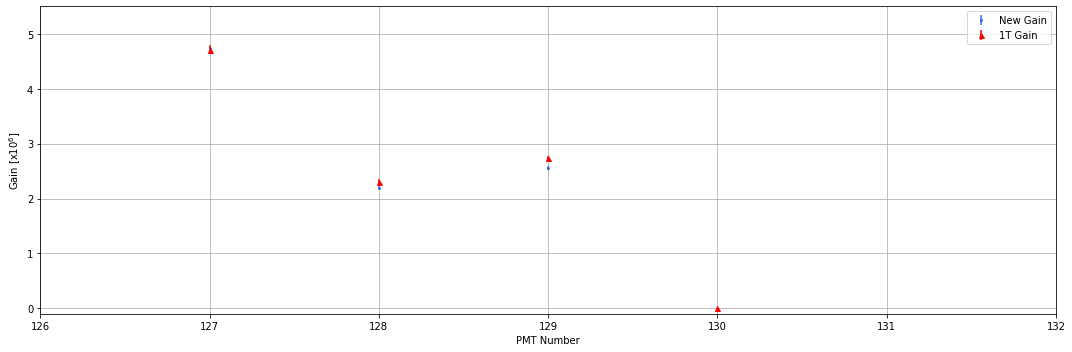

In [108]:
plt.figure(figsize=(15,5))
plt.errorbar(Gain['channel'], Gain['gain'], yerr=Gain['gain error'], linestyle = '', fmt='o', markersize=2, color='royalblue', label='New Gain')
plt.errorbar(pmt[127:131], gain_1t[127:131], yerr=gain_1t_err[127:131], linestyle = '', fmt='^', markersize=5, color='red',label='1T Gain')
plt.xlabel('PMT Number')
plt.ylabel('Gain [x10$^6$]')
plt.ylim(-0.1,5.5)
plt.xlim(126,132)
plt.legend()
plt.grid()
plt.tight_layout()